### Pulsar Detection Through Mean Image stacking Methods
#### JupyterNoteBook Writer: Radha Krishna Mallik, PhD Scholor
##### https://github.com/rkmallik360/pulsarDetection

<img src = "lightsmall-optimised.gif">

### PULSAR DETECTION THROUGH REAL LARGE DATA SET USING MEAN STACKING


In [10]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

### WORKING WITH "FLEXIBLE IMAGE TRANSPORT SYSTEM" (FITS ) FILE

In [11]:
#### We're going to use the Astropy module to read and write FITS File

In [12]:
# Importing AstroPY Package and opening fits file to see its header informations
# Opening a FITS file in Astropy returns a HDU (Header/Data Unit) list. 
# Each HDU stores headers and (optionally) image data.
#The header contains metadata about the HDU object, e.g. its dimensions and data type.
#Every HDU can contain image data. The first HDU is called the primary HDU.
#If we want to access individual HDUs, we can index the HDU list object returned by fits.open. 



hdulist = fits.open('pulsar_example_fits_1000/0000.fits')
hdulist.info()

Filename: pulsar_example_fits_1000/0000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (200, 200)   float32   


### 4) EVALUATING SINGLE MEAN FITS FILE FROM SET OF FITS FILE

#### Calculates the `running mean` and `stdev` for a list of FITS files using `Welford's` method

### Welford's online algorithm

It is often useful to be able to compute the variance in a `One-pass algorithm single pass`, inspecting each value $ x_i $ only once; for example, when the data is being collected without enough storage to keep all the values, or when costs of memory access dominate those of computation.  For such an `online algorithm`, a `recurrence relation` is required between quantities from which the required statistics can be calculated in a numerically stable fashion.

The following formulas can be used to update the `mean` and `(estimated) variance` of the sequence, for an additional element $x_n $. Here, $ \bar x_n $ denotes the sample mean of the first ''n'' samples.

$$
 \bar x_n = \frac{(n-1) \, \bar x_{n-1} + x_n}{n} = \bar x_{n-1} + \frac{x_n - \bar x_{n-1}}{n}
$$





In [13]:
# Write your mean_datasets function here
# Running mean to save memory
def running_stats(file_names):
    """Calculates the running mean and stdev for a list of FITS files using
    Welford's method."""
    n, s, mean = 0, 0, 0
    for filename in file_names:
        hdu_list = fits.open(filename)
        data = hdu_list[0].data
        if n == 0:
            mean = np.zeros_like(data)
        n += 1
        delta = data - mean
        mean += delta / n
        hdu_list.close()
    if n < 2:
        return mean, None
    else:
        return mean

## Mean using all file at once{ inefficient code: not used for large file}
def mean_fits(p):  
  for i in range(len(p)):
    p[i] = fits.open(p[i])
    p[i] = p[i][0].data
  sum_data = sum(k for k in p)
  return np.round(sum_data/len(p),5)

### USING 1000 NOS OF FITS FILE FOR STACKING FORM FOLDER PULSAR_EXAMPLE_FITS_1000

#### Creating list of Image files and calling mean_fits function to create single mean fits file

In [14]:
# List the Input FITS files and Call your function to get average of the FITS files
n = 1000 # no of image file to stack, max limit 1000
file1 = ['pulsar_example_fits_1000/{}.fits'.format(str(i).zfill(4)) for i in range(n)]

#Loading running_stats function, 
data = running_stats(file1)

Pulsar Detection at (RA,DEC): (176, 139)


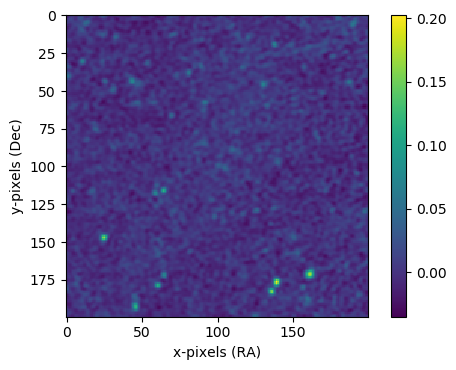

In [15]:
# Finding location of brightest pixel from mean file
ind = np.unravel_index(np.argmax(data, axis=None), data.shape)
print("Pulsar Detection at (RA,DEC):",ind)


# Plot the Average FITS File
plt.figure(dpi=100)    
plt.imshow(data, cmap=plt.cm.viridis)
plt.xlabel("x-pixels (RA)")
plt.ylabel("y-pixels (Dec)")
plt.colorbar()
plt.show()

### USING 7330 NOS OF FITS FILE FOR STACKING FORM FOLDER PULSAR_EXAMPLE_FITS_7330

In [18]:
# List the Input FITS files and Call your function to get average of the FITS files
n = 7330 # no of image file to stack, max limit 7329
file1 = ['pulsar_example_fits_7330/{}.fits'.format(str(i).zfill(4)) for i in range(n)]
#data = mean_fits(file1)
data = running_stats(file1)

Pulsar Detection at (RA,DEC): (176, 139)


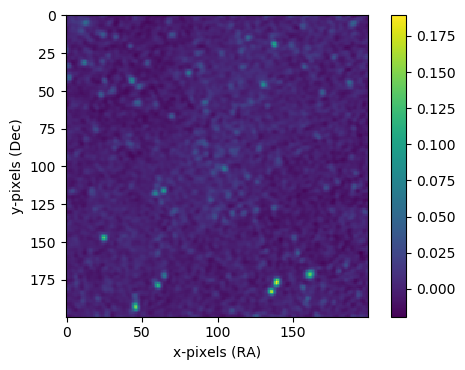

In [19]:
ind = np.unravel_index(np.argmax(data, axis=None), data.shape)

print("Pulsar Detection at (RA,DEC):",ind)
# Plot the Average FITS File
plt.figure(dpi=100)    
plt.imshow(data, cmap=plt.cm.viridis)
plt.xlabel("x-pixels (RA)")
plt.ylabel("y-pixels (Dec)")
plt.colorbar()
plt.show()